<a href="https://colab.research.google.com/github/JaehwanKim00/Toyproject_2024_2nd/blob/main/apple_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 변수 설명
##Date
###주식 데이터가 기록된 날짜를 나타냅니다.
###YYYY-MM-DD 형식으로 표기되며,
###데이터를 시계열 분석할 때 매우 중요합니다.
###Ex) 2023-09-15 (2023년 9월 15일)

##Open
###해당 날짜의 시가로, 장이 열릴 때의 주식 가격을 의미합니다.
###이는 투자자들이 해당 주식에 대한 초기 거래 의향을 반영합니다.
### Ex) 장 시작 시 애플 주식의 가격이 $150이었다면, Open은 150입니다.

##High
###해당 날짜 동안 거래된 주식의 최고가입니다.
###즉, 하루 중 가장 높은 가격을 나타냅니다.
### Ex) $155

##Low
###해당 날짜 동안 거래된 주식의 최저가입니다.
###즉, 하루 중 가장 낮은 가격을 나타냅니다.
### Ex) $145

##Close
###해당 날짜의 종가로, 장이 마감될 때의 주식 가격을 의미합니다.
###종가는 투자자들이 주식에 대한 종합적인 평가를 가장 잘 반영하는 가격 중 하나로 간주됩니다.
### Ex) $152

##Adj Close
###조정 종가로, 배당, 주식 분할 등 주식 가격에 영향을 미치는 이벤트를 고려한 종가입니다.
### 이는 투자자들이 실질적인 투자 수익을 분석할 때 유용한 지표입니다.
### Ex) 배당금을 반영한 종가가 $152.5로 조정될 수 있습니다.

##Volume
###해당 날짜 동안 거래된 주식의 총 수량입니다.
###이는 주식 거래의 활발함을 나타내며, 거래량이 높을수록 시장 참여가 활발했음을 의미합니다.
### Ex) 10,000,000 (천만 주가 거래됨)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('/content/drive/MyDrive/toyproject_apple/aapl_us_d.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1984-09-07,0.100763,0.101999,0.099546,0.100763,9.767604e+07
1,1984-09-10,0.100763,0.101071,0.098340,0.100165,7.581254e+07
2,1984-09-11,0.101071,0.103814,0.101071,0.101999,1.787705e+08
3,1984-09-12,0.101999,0.102597,0.098928,0.098928,1.561713e+08
4,1984-09-13,0.104432,0.104730,0.104432,0.104432,2.432310e+08


In [4]:
data.tail()

,Date,Open,High,Low,Close,Volume
10075,2024-08-30,230.190,230.40,227.48,229.00,52990770.0
10076,2024-09-03,228.550,229.00,221.17,222.77,50190574.0
10077,2024-09-04,221.660,221.78,217.48,220.85,43840196.0
10078,2024-09-05,221.625,225.48,221.52,222.38,36615398.0
10079,2024-09-06,223.950,225.24,219.77,220.86,48370990.0


In [5]:
data.info() # 결측치 하나도 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10080 non-null  object 
 1   Open    10080 non-null  float64
 2   High    10080 non-null  float64
 3   Low     10080 non-null  float64
 4   Close   10080 non-null  float64
 5   Volume  10080 non-null  float64
dtypes: float64(5), object(1)
memory usage: 472.6+ KB


In [6]:
data.describe()

,Open,High,Low,Close,Volume
count,10080.000000,10080.000000,10080.000000,10080.000000,1.008000e+04
mean,24.212653,24.474183,23.962728,24.228588,3.901825e+08
std,48.475894,48.997820,47.988301,48.513977,4.026818e+08
min,0.055411,0.056019,0.054803,0.054803,2.811754e+06
25%,0.292936,0.298629,0.286002,0.292288,1.385973e+08
50%,0.884054,0.907432,0.864364,0.883006,2.576699e+08
75%,21.635500,21.869775,21.426925,21.649000,4.927167e+08
max,236.480000,237.230000,233.090000,234.820000,8.706575e+09


In [7]:
# 결측치 확인
data.isnull().sum()




,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [8]:
data['Date'] = pd.to_datetime(data['Date'])


# Date에 따른 주가 시각화

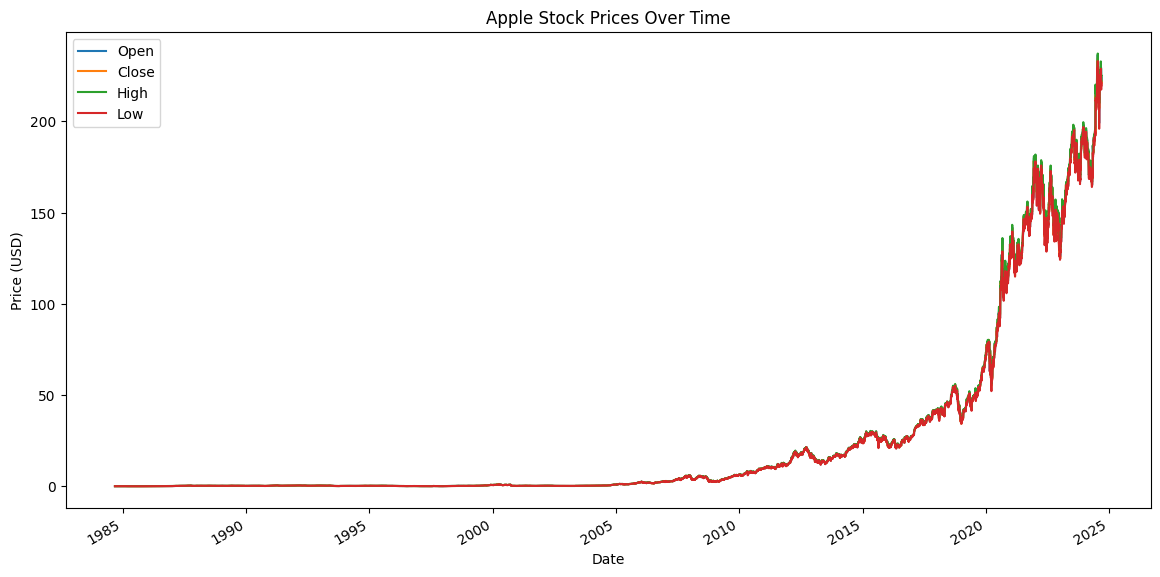

In [9]:
import matplotlib.pyplot as plt

# Date를 인덱스로 설정
data.set_index('Date', inplace=True)

# 시가, 종가, 고가, 저가의 시계열 그래프
data[['Open', 'Close', 'High', 'Low']].plot(figsize=(14,7), title='Apple Stock Prices Over Time')
plt.ylabel('Price (USD)')
plt.show()


# Date에 따른 거래량 시각화

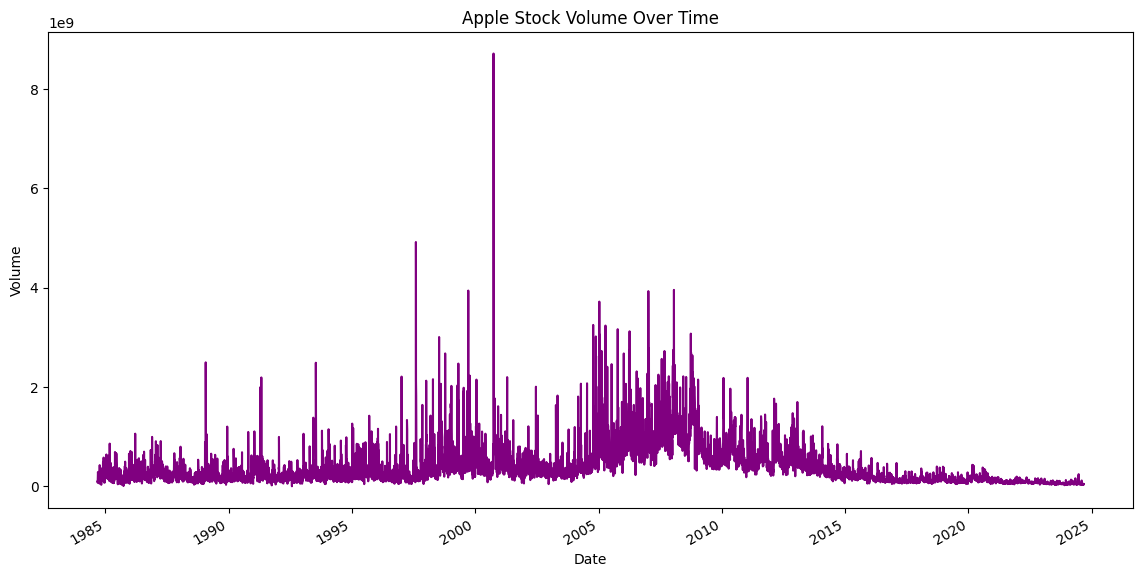

In [10]:
data['Volume'].plot(figsize = (14,7),title = 'Apple Stock Volume Over Time',color = 'purple')
plt.ylabel('Volume')
plt.show()

# 상관관계

## 궁금한 점
###아래 상관관계는 전체 기간 동안의 거래량과 주가의 상관관계
###근데 주가를 예측할 거라면 그나마 최근 Date의 거래량과 주가의 상관관계를 봐야하지 않을까?

            Open      High       Low     Close    Volume
Open    1.000000  0.999942  0.999941  0.999873 -0.306156
High    0.999942  1.000000  0.999923  0.999941 -0.305832
Low     0.999941  0.999923  1.000000  0.999940 -0.306658
Close   0.999873  0.999941  0.999940  1.000000 -0.306259
Volume -0.306156 -0.305832 -0.306658 -0.306259  1.000000


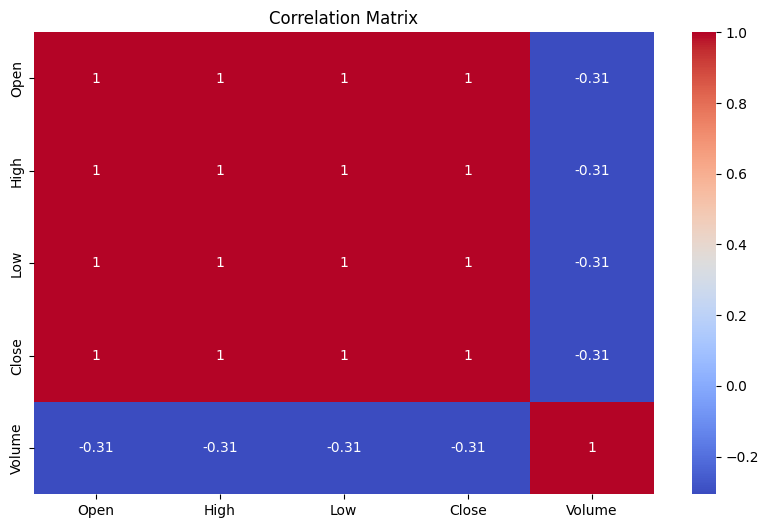

In [11]:
import seaborn as sns
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
print(correlation_matrix)

# 상관관계 히트맵

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 이상치
## 이거 이상치도 마찬가지
## 시기별로 나눠서 이상치를 판단하는게 맞을 듯

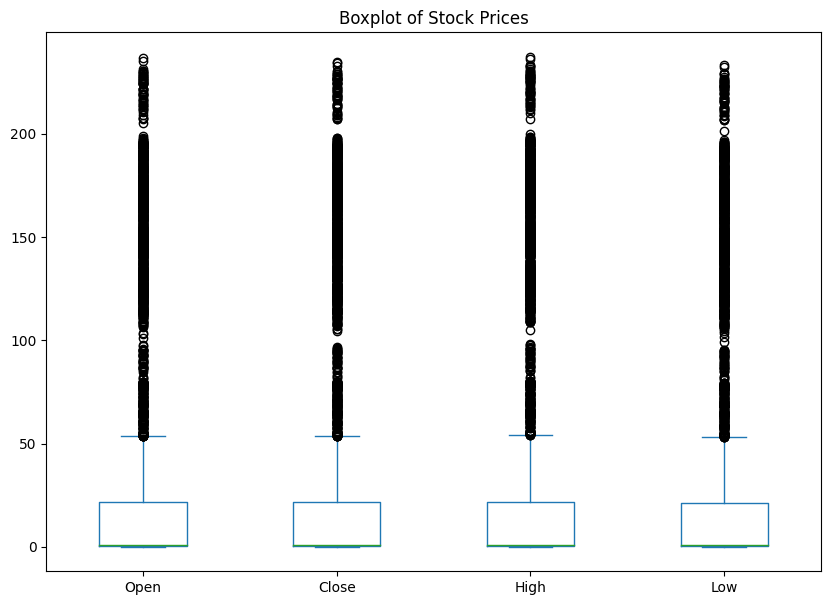

In [12]:
data[['Open','Close','High','Low']].plot(kind = 'box',figsize = (10,7))
plt.title('Boxplot of Stock Prices')
plt.show()

# 추세 및 이동평균

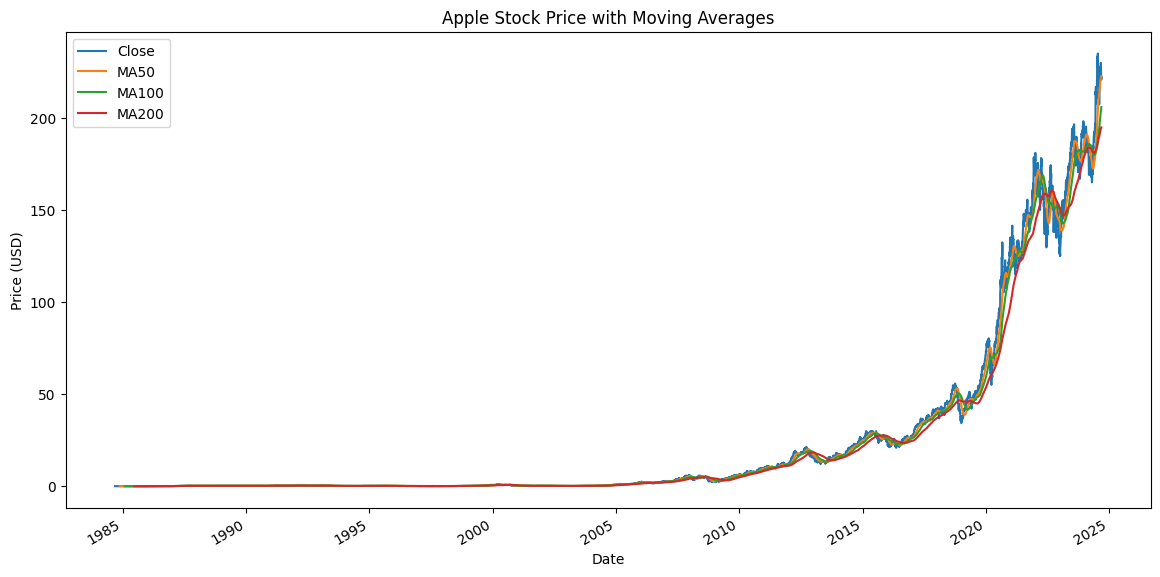

In [13]:
# 50일, 200일 이동평균 계산
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA100'] = data['Close'].rolling(window=100).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# 이동평균 시각화
data[['Close', 'MA50','MA100', 'MA200']].plot(figsize=(14,7), title='Apple Stock Price with Moving Averages')
plt.ylabel('Price (USD)')
plt.show()

# 변동성

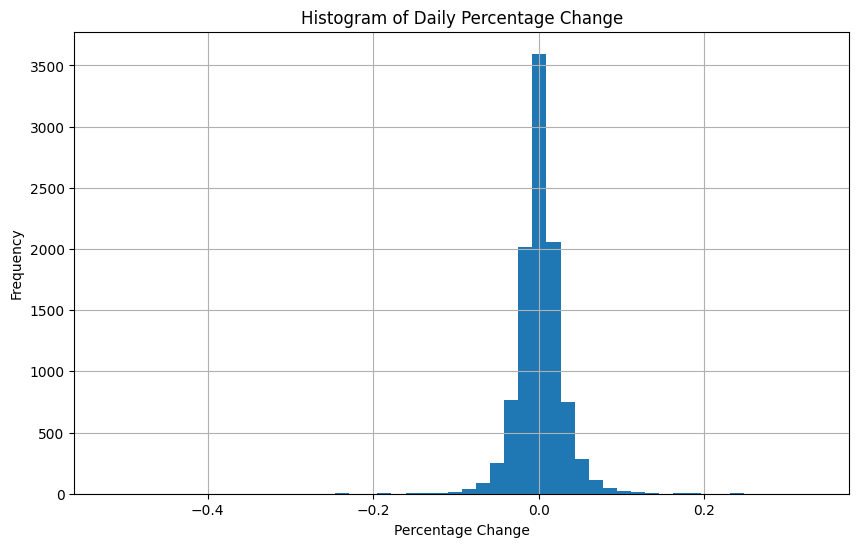

In [14]:
# 일일 변동률 계산 (종가 기준)
data['Daily Change'] = data['Close'].pct_change()

# 일일 변동률 히스토그램
data['Daily Change'].hist(bins=50, figsize=(10,6))
plt.title('Histogram of Daily Percentage Change')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.show()


# 시즌성
## 특정 달이나 분기뱔로 주가가 변동하는 패턴 확인

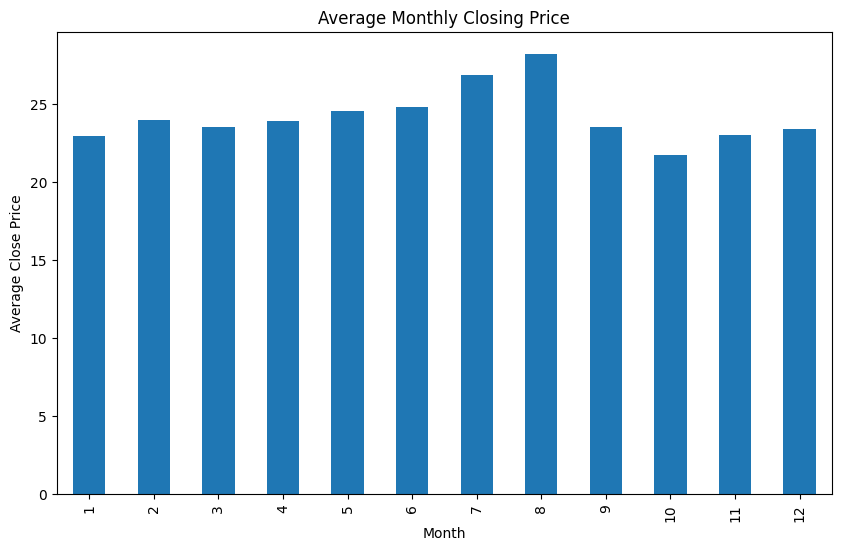

In [15]:
# 월별 평균 주가
data['Month'] = data.index.month
monthly_avg = data.groupby('Month')['Close'].mean()

# 월별 주가 시각화
monthly_avg.plot(kind='bar', figsize=(10,6), title='Average Monthly Closing Price')
plt.ylabel('Average Close Price')
plt.show()

# 특정 이벤트 탐지
## 특정한 주식 이벤트(예: 급격한 상승/하락일)를 탐지

In [16]:
# 급격한 상승 또는 하락 일자 탐지
significant_changes = data[data['Daily Change'].abs() > 0.05]  # 5% 이상 변동한 날
print(significant_changes[['Close', 'Daily Change']])


                 Close  Daily Change
Date                                
1984-09-13    0.104432      0.055633
1984-10-15    0.091012      0.056475
1984-11-06    0.099546      0.061670
1984-11-09    0.088301     -0.058268
1984-11-19    0.083106     -0.058823
...                ...           ...
2022-09-13  153.585000     -0.058679
2022-10-28  155.482000      0.075553
2022-11-10  146.870000      0.088975
2024-05-03  183.380000      0.059816
2024-06-11  207.150000      0.072649

[607 rows x 2 columns]


# LSTM,GRU 이용한 주가 예측
## 1985 ~ 2022 Train 2023~2024/9/XX Test
## 1985 ~ 2023 Train 2024 Test
## 이렇게 두 번 해보기




In [17]:
data = pd.read_csv('/content/drive/MyDrive/toyproject_apple/aapl_us_d.csv')
data['Date'] = pd.to_datetime(data['Date'])
df = data.copy()
df.head()

,Date,Open,High,Low,Close,Volume
0,1984-09-07,0.100763,0.101999,0.099546,0.100763,9.767604e+07
1,1984-09-10,0.100763,0.101071,0.098340,0.100165,7.581254e+07
2,1984-09-11,0.101071,0.103814,0.101071,0.101999,1.787705e+08
3,1984-09-12,0.101999,0.102597,0.098928,0.098928,1.561713e+08
4,1984-09-13,0.104432,0.104730,0.104432,0.104432,2.432310e+08


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10080 non-null  datetime64[ns]
 1   Open    10080 non-null  float64       
 2   High    10080 non-null  float64       
 3   Low     10080 non-null  float64       
 4   Close   10080 non-null  float64       
 5   Volume  10080 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 472.6 KB


In [19]:
df = df[['Date','Open', 'High','Low',"Close","Volume"]].round(4)
df.head()

,Date,Open,High,Low,Close,Volume
0,1984-09-07,0.1008,0.1020,0.0995,0.1008,9.767604e+07
1,1984-09-10,0.1008,0.1011,0.0983,0.1002,7.581254e+07
2,1984-09-11,0.1011,0.1038,0.1011,0.1020,1.787705e+08
3,1984-09-12,0.1020,0.1026,0.0989,0.0989,1.561713e+08
4,1984-09-13,0.1044,0.1047,0.1044,0.1044,2.432310e+08


In [20]:
df.tail()

,Date,Open,High,Low,Close,Volume
10075,2024-08-30,230.190,230.40,227.48,229.00,52990770.0
10076,2024-09-03,228.550,229.00,221.17,222.77,50190574.0
10077,2024-09-04,221.660,221.78,217.48,220.85,43840196.0
10078,2024-09-05,221.625,225.48,221.52,222.38,36615398.0
10079,2024-09-06,223.950,225.24,219.77,220.86,48370990.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10080 non-null  datetime64[ns]
 1   Open    10080 non-null  float64       
 2   High    10080 non-null  float64       
 3   Low     10080 non-null  float64       
 4   Close   10080 non-null  float64       
 5   Volume  10080 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 472.6 KB


In [22]:
# Date 열을 인덱스로 설정
df.set_index('Date', inplace=True)
train_data = df[:'2021-12-31']
test_data = df['2022-01-01':]

# 각 데이터셋의 크기 출력
print("There are " + str(train_data.shape[0]) + " observations in the training data")
print("There are " + str(test_data.shape[0]) + " observations in the test data")

There are 9407 observations in the training data
There are 673 observations in the test data


<Axes: xlabel='Date'>

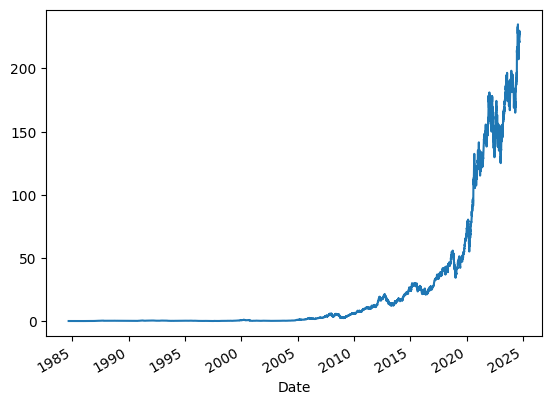

In [23]:
df['Close'].plot()

## LSTM

In [24]:
def ts_train_test_normalize(all_data, time_steps, for_periods):
    """
    input:
        data: dataframe with dates and price data
    output:
        X_train, y_train: data from 2013/1/1-2018/12/31
        X_test : data from 2019-
        sc :     insantiated MinMaxScaler object fit to the training data
    """
    # create training and test set
    ts_train =df[:'2021-12-31'].iloc[:,0:1].values
    ts_test = df['2022-01-01':].iloc[:,0:1].values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # scale the data
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range=(0,1))
    ts_train_scaled = sc.fit_transform(ts_train)

    from sklearn.preprocessing import RobustScaler

    # Initialize RobustScaler
    # sc = RobustScaler()

    # Scale the training data
    # ts_train_scaled = sc.fit_transform(ts_train)

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
    for i in range(time_steps, ts_train_len-1):
        X_train.append(ts_train_scaled[i-time_steps:i, 0])
        y_train.append(ts_train_scaled[i:i+for_periods, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1 ))

    inputs = pd.concat((df["Close"][:'2021-12-31'], df["Close"]['2022-01-01':]), axis=0).values
    inputs = inputs[len(inputs)-len(ts_test)-time_steps:]
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)

    # Preparing X_test
    X_test = []
    for i in range(time_steps, ts_test_len + time_steps - for_periods):
        X_test.append(inputs[i-time_steps:i,0])

    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    return X_train, y_train , X_test, sc

In [25]:
X_train, y_train, X_test, sc = ts_train_test_normalize(df, 5,2)
X_train.shape[0], X_train.shape[1]

(9401, 5)

In [26]:
# Convert the 3D shape of X_train to a data frame so we can see:
X_train_see = pd.DataFrame(np.reshape(X_train, (X_train.shape[0], X_train.shape[1])))
y_train_see = pd.DataFrame(y_train)
pd.concat([X_train_see, y_train_see], axis = 1)

# Convert the 3D shape of X_test to a data frame so we can see:
X_test_see = pd.DataFrame(np.reshape(X_test, (X_test.shape[0], X_test.shape[1])))
pd.DataFrame(X_test_see)

print("There are " + str(X_train.shape[0]) + " samples in the training data")
print("There are " + str(X_test.shape[0]) + " samples in the test data")

There are 9401 samples in the training data
There are 671 samples in the test data


In [27]:
def LSTM_model(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM
    from keras.optimizers import SGD

    # The LSTM architecture
    my_LSTM_model = Sequential()
    my_LSTM_model.add(LSTM(units = 50,
                           return_sequences = True,
                           input_shape = (X_train.shape[1],1),
                           activation = 'tanh'))
    my_LSTM_model.add(LSTM(units = 50, activation = 'tanh'))
    my_LSTM_model.add(Dense(units=2))

    # Compiling
    my_LSTM_model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False),
    loss='mean_squared_error'
)

    # Fitting to the training set
    my_LSTM_model.fit(X_train, y_train, epochs = 50, batch_size = 150, verbose = 0)

    LSTM_prediction = my_LSTM_model.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)

    return my_LSTM_model, LSTM_prediction

In [28]:
def actual_pred_plot(preds):
    """
    Plot the actual vs predition
    """
    actual_pred = pd.DataFrame(columns = ['Close', 'prediction'])
    actual_pred['Close'] = df.loc['2022-01-01':,'Close'][0:len(preds)]
    actual_pred['prediction'] = preds[:,0]

    from keras.metrics import MeanSquaredError
    m = MeanSquaredError()
    m.update_state(np.array(actual_pred['Close']), np.array(actual_pred['prediction']))

    return (m.result().numpy(), actual_pred.plot())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


(83.540634, <Axes: xlabel='Date'>)

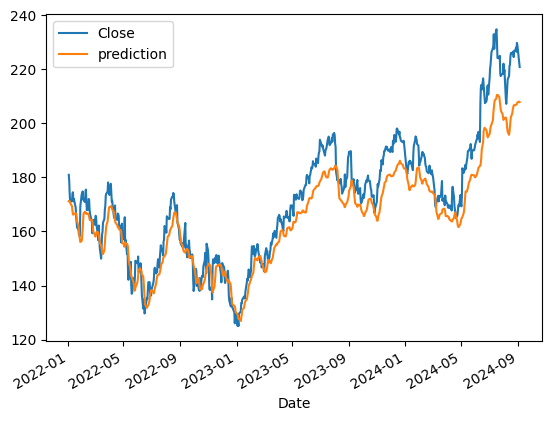

In [29]:
my_LSTM_model, LSTM_prediction = LSTM_model(X_train, y_train, X_test, sc)
LSTM_prediction[1:10]
actual_pred_plot(LSTM_prediction)

In [30]:
y_pred = pd.DataFrame(LSTM_prediction[:, 0])
y_test=df.loc['2022-01-01':,'Close'][0:len(LSTM_prediction)]
y_test.reset_index(drop=True, inplace=True)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

def confirm_result(y_test, y_pred):
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    MSLE = mean_squared_log_error(y_test, y_pred)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, y_pred))
    R2 = r2_score(y_test, y_pred)

    pd.options.display.float_format = '{:.5f}'.format
    Result = pd.DataFrame(data=[MAE,RMSE, RMSLE, R2],
                         index = ['MAE','RMSE', 'RMSLE', 'R2'],
                         columns=['Results'])
    return Result

In [32]:
confirm_result(y_test, y_pred)

,Results
MAE,7.35237
RMSE,9.14006
RMSLE,0.04935
R2,0.84154


## GRU

In [33]:
def GRU_model(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU
    from keras.optimizers import SGD

    # The GRU architecture
    my_GRU_model = Sequential()
    my_GRU_model.add(GRU(units = 50,
                         return_sequences = True,
                         input_shape = (X_train.shape[1],1),
                         activation = 'tanh'))
    my_GRU_model.add(GRU(units = 50,
                         activation = 'tanh'))
    my_GRU_model.add(Dense(units = 2))

    # Compiling the GRU model
    my_GRU_model.compile(
        optimizer=SGD(learning_rate=0.01, momentum=0.95, nesterov=False),
        loss='mean_squared_error'
    )

    # Fitting to the trainig set
    my_GRU_model.fit(X_train, y_train, epochs = 100, batch_size = 100, verbose = -1)

    GRU_prediction = my_GRU_model.predict(X_test)
    GRU_prediction = sc.inverse_transform(GRU_prediction)

    return my_GRU_model, GRU_prediction

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 7

(35.60717, <Axes: xlabel='Date'>)

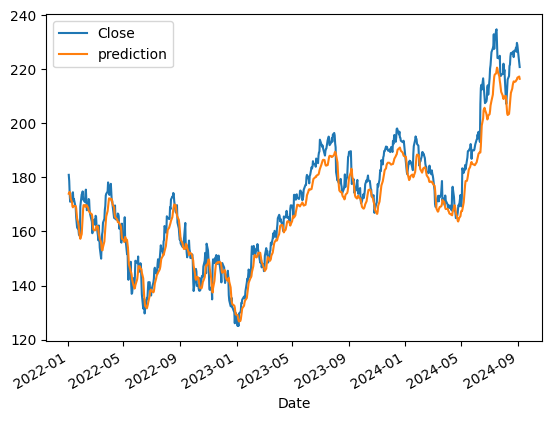

In [34]:
my_GRU_model, GRU_prediction = GRU_model(X_train, y_train, X_test, sc)
GRU_prediction[1:10]
actual_pred_plot(GRU_prediction)

In [35]:
y_pred_gru = pd.DataFrame(GRU_prediction[:, 0])
y_test_gru=df.loc['2022-01-01':,'Close'][0:len(GRU_prediction)]
y_test_gru.reset_index(drop=True, inplace=True)

In [36]:
confirm_result(y_test_gru, y_pred_gru)

,Results
MAE,4.79416
RMSE,5.96717
RMSLE,0.03295
R2,0.93246


In [37]:
# train 데이터 2022-12-31까지
# test 데이터 2023-01-01부터
# LSTM 결과
# 	Results
# MAE	7.95851
# RMSE	9.69968
# RMSLE	0.04998
# R2	0.79921

# GRU 결과
# 	Results
# MAE	5.69650
# RMSE	7.02893
# RMSLE	0.03629
# R2	0.89456

# train 데이터 2021-12-31까지
# test 데이터 2022-01-01부터
# LSTM 결과
# 	Results
# MAE	10.23800
# RMSE	12.40333
# RMSLE	0.06733
# R2	0.70819

# GRU 결과
#	Results
# MAE	4.81701
# RMSE	6.02663
# RMSLE	0.03317
# R2	0.93111 -> 이게 가장 결과 좋아서 GRU 모델로 정하고 Hyper Parameter 조정

# train 데이터 2023-12-31까지
# test 데이터 2024-01-01부터
# LSTM 결과
#	Results
# MAE	8.07543
# RMSE	10.13786
# RMSLE	0.04912
# R2	0.75833

# GRU 결과
# Results
# MAE	4.68784
# RMSE	6.07155
# RMSLE	0.02966
# R2	0.91332



# Robust Scaler 적용 후

# train 데이터 2021-12-31까지
# test 데이터 2022-01-01부터
# GRU 결과
#	Results
# MAE	5.76996
# RMSE	8.62980
# RMSLE	0.04375
# R2	0.85874


# 다시 MinMax Scaler
# epoch = 100, momentum = 0.95, batch_size = 100
# # GRU 결과
# 	Results
# MAE	4.38313
# RMSE	5.49384
# RMSLE	0.03049
# R2	0.94275 -> 0.94까지 올림

# 다른 LSTM 코드 사용해보기

In [88]:
import torch
import torch.nn
import torchvision.transforms as transforms
import torchvision.datasets
from torch.autograd import Variable
from torch.nn import Parameter
import torch.nn as nn
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import math

import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
plt.style.use('seaborn-whitegrid')

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

cuda = True if torch.cuda.is_available() else False
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

torch.manual_seed(125)

if torch.cuda.is_available() :
    torch.cuda.manual_seed_all(125)
import yfinance as yf
data = pd.read_csv('/content/drive/MyDrive/toyproject_apple/aapl_us_d.csv')
data['Date'] = pd.to_datetime(data['Date'])
df = data.copy()
df.head()

<ipython-input-88-2f459484ee5f>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


,Date,Open,High,Low,Close,Volume
0,1984-09-07,0.10076,0.10200,0.09955,0.10076,97676041.83885
1,1984-09-10,0.10076,0.10107,0.09834,0.10017,75812543.28375
2,1984-09-11,0.10107,0.10381,0.10107,0.10200,178770477.03120
3,1984-09-12,0.10200,0.10260,0.09893,0.09893,156171258.19595
4,1984-09-13,0.10443,0.10473,0.10443,0.10443,243230959.39553


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10080 non-null  datetime64[ns]
 1   Open    10080 non-null  float64       
 2   High    10080 non-null  float64       
 3   Low     10080 non-null  float64       
 4   Close   10080 non-null  float64       
 5   Volume  10080 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 472.6 KB


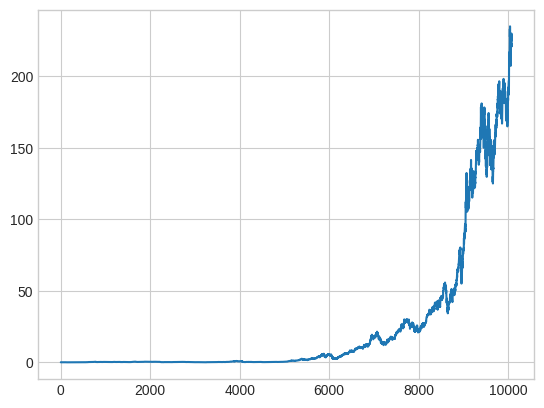

In [90]:
# data check
fig = df['Close'].plot()

In [91]:
X = df.drop('Close', axis=1) # X, y 분리
y = df[['Close']]

In [92]:
X.head()

,Date,Open,High,Low,Volume
0,1984-09-07,0.10076,0.10200,0.09955,97676041.83885
1,1984-09-10,0.10076,0.10107,0.09834,75812543.28375
2,1984-09-11,0.10107,0.10381,0.10107,178770477.03120
3,1984-09-12,0.10200,0.10260,0.09893,156171258.19595
4,1984-09-13,0.10443,0.10473,0.10443,243230959.39553


In [93]:
X[9406:]

,Date,Open,High,Low,Volume
9406,2021-12-31,177.06000,178.19600,176.23300,64434063.02474
9407,2022-01-03,176.80100,181.82500,176.68100,105308881.83607
9408,2022-01-04,181.57600,181.88500,178.08700,99886812.65701
9409,2022-01-05,178.57600,179.13400,173.63000,95086276.52172
9410,2022-01-06,171.63600,174.28900,170.65000,97466363.21906
...,...,...,...,...,...
10075,2024-08-30,230.19000,230.40000,227.48000,52990770.00000
10076,2024-09-03,228.55000,229.00000,221.17000,50190574.00000
10077,2024-09-04,221.66000,221.78000,217.48000,43840196.00000
10078,2024-09-05,221.62500,225.48000,221.52000,36615398.00000


In [94]:
X[:9407]

,Date,Open,High,Low,Volume
0,1984-09-07,0.10076,0.10200,0.09955,97676041.83885
1,1984-09-10,0.10076,0.10107,0.09834,75812543.28375
2,1984-09-11,0.10107,0.10381,0.10107,178770477.03120
3,1984-09-12,0.10200,0.10260,0.09893,156171258.19595
4,1984-09-13,0.10443,0.10473,0.10443,243230959.39553
...,...,...,...,...,...
9402,2021-12-27,176.06300,179.38200,176.04300,75354398.09238
9403,2021-12-28,179.12400,180.28000,177.49900,79603673.87884
9404,2021-12-29,178.29600,179.59200,177.11000,62710789.65636
9405,2021-12-30,178.43600,179.53200,177.06000,60119922.99010


In [95]:
X[9407:]

,Date,Open,High,Low,Volume
9407,2022-01-03,176.80100,181.82500,176.68100,105308881.83607
9408,2022-01-04,181.57600,181.88500,178.08700,99886812.65701
9409,2022-01-05,178.57600,179.13400,173.63000,95086276.52172
9410,2022-01-06,171.63600,174.28900,170.65000,97466363.21906
9411,2022-01-07,171.89600,173.13200,170.04100,87212386.50621
...,...,...,...,...,...
10075,2024-08-30,230.19000,230.40000,227.48000,52990770.00000
10076,2024-09-03,228.55000,229.00000,221.17000,50190574.00000
10077,2024-09-04,221.66000,221.78000,217.48000,43840196.00000
10078,2024-09-05,221.62500,225.48000,221.52000,36615398.00000


In [96]:
y.head()

,Close
0,0.10076
1,0.10017
2,0.10200
3,0.09893
4,0.10443


In [97]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ms = MinMaxScaler() # 0 ~ 1
ss = StandardScaler() # 평균 0, 분산 1


X_numeric = X.select_dtypes(exclude=['datetime64'])
X_ss = ss.fit_transform(X_numeric)
y_ms = ms.fit_transform(y)

X_train = X_ss[:9407]
X_test = X_ss[9407:]

y_train = y_ms[:9407]
y_test = y_ms[9407:]

print('Training Shape :', X_train.shape, y_train.shape)
print('Testing Shape :', X_test.shape, y_test.shape)


Training Shape : (9407, 4) (9407, 1)
Testing Shape : (673, 4) (673, 1)


In [98]:
# 데이터셋 형태 및 크기 조정
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors,
                                  (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))

X_test_tensors_f = torch.reshape(X_test_tensors,
                                (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

print('Training Shape :', X_train.shape, y_train.shape)
print('Testing Shape :', X_test.shape, y_test.shape)

Training Shape : (9407, 4) (9407, 1)
Testing Shape : (673, 4) (673, 1)


In [99]:
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM, self).__init__()
        self.num_classes = num_classes # 클래스
        self.num_layers = num_layers # LSTM 계층 개수
        self.input_size = input_size  # 입력 크기(컬럼 개수)
        self.hidden_size = hidden_size # 은닉층의 뉴런 개수
        self.seq_length = seq_length # 시퀀스 길이

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) # lstm 계층
        self.fc_1 =  nn.Linear(hidden_size, 128) # 완전연결층
        self.fc = nn.Linear(128, num_classes) # 출력층

        self.relu = nn.ReLU()

    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) # 은닉상태 초기화
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) # 셀 상태 초기화

        output, (hn, cn) = self.lstm(x, (h_0, c_0)) # lstm 계층에 은닉 상태와 셀 상태 적용
        hn = hn.view(-1, self.hidden_size) # 완전연결층 적용을 위해 데이터 형태를 1차원으로 조정
        out = self.relu(hn)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.fc(out)
        return out

In [100]:
num_epochs = 1000
lr = 0.0001  # 학습률

input_size = 4  # 입력의 칼럼 개수
hidden_size = 2  # 은닉층 유닛 개수
num_layers = 1  # LSTM 계층 개수

num_classes = 1  # 출력 클래스 개수
model = LSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1])

criterion = torch.nn.MSELoss()  # 손실 함수
optimizer = torch.optim.Adam(model.parameters(), lr=lr)  # lr 사용


In [101]:
for epoch in range(num_epochs) :
    outputs = model.forward(X_train_tensors_f) # 전방향 학습
    optimizer.zero_grad()
    loss = criterion(outputs, y_train_tensors) # 오차 계산
    loss.backward() # 기울기 계산

    optimizer.step() # 오차 업데이트
    if epoch % 100 == 0 :
        print(f'Epoch : {epoch}, loss : {loss.item():1.5f}')

Epoch : 0, loss : 0.02139
Epoch : 100, loss : 0.01401
Epoch : 200, loss : 0.01324
Epoch : 300, loss : 0.01223
Epoch : 400, loss : 0.01097
Epoch : 500, loss : 0.00949
Epoch : 600, loss : 0.00797
Epoch : 700, loss : 0.00655
Epoch : 800, loss : 0.00531
Epoch : 900, loss : 0.00428


In [102]:
X.head()

,Date,Open,High,Low,Volume
0,1984-09-07,0.10076,0.10200,0.09955,97676041.83885
1,1984-09-10,0.10076,0.10107,0.09834,75812543.28375
2,1984-09-11,0.10107,0.10381,0.10107,178770477.03120
3,1984-09-12,0.10200,0.10260,0.09893,156171258.19595
4,1984-09-13,0.10443,0.10473,0.10443,243230959.39553


In [103]:
df_x_ss = ss.transform(X_numeric)
df_y_ms = ms.transform(y)

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

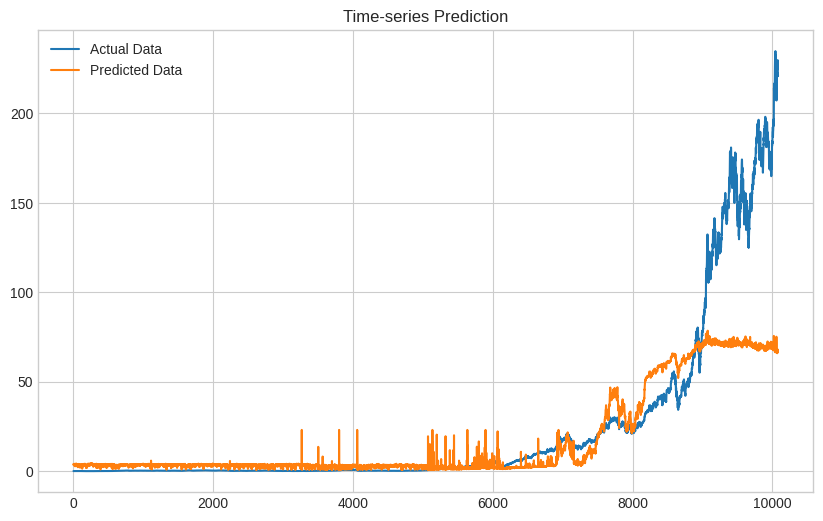

In [104]:
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy()

label_y = df_y_ms.data.numpy()

predicted = ms.inverse_transform(predicted)
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10, 6))
# plt.axvline(x=datetime(2022,5,1), c='r', linestyle='--')

df['pred'] = predicted
plt.plot(df['Close'], label='Actual Data')
plt.plot(df['pred'], label='Predicted Data')

plt.title('Time-series Prediction')
plt.legend()
plt.show()

In [105]:
class GRU(nn.Module) :
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length) :
        super(GRU, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.gru = nn.GRU(input_size=input_size,hidden_size=hidden_size,
                         num_layers=num_layers,batch_first=True)
        self.fc_1 = nn.Linear(hidden_size, 128)
        self.fc = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x) :
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        output, (hn) = self.gru(x, (h_0))
        hn = hn.view(-1, self.hidden_size)
        out = self.relu(hn)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.fc(out)
        return out

In [106]:
num_epochs = 1000
learning_rate = 0.0001

input_size=4
hidden_size=2
num_layers=1

num_classes=1
model=GRU(num_classes,input_size,hidden_size,num_layers,X_train_tensors_f.shape[1])

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [107]:
for epoch in range(num_epochs) :
    outputs = model.forward(X_train_tensors_f)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train_tensors)
    loss.backward()

    optimizer.step()
    if epoch % 100 == 0 :
        print(f'Epoch : {epoch}, loss : {loss.item():1.5f}')

Epoch : 0, loss : 0.04872
Epoch : 100, loss : 0.01505
Epoch : 200, loss : 0.00973
Epoch : 300, loss : 0.00611
Epoch : 400, loss : 0.00368
Epoch : 500, loss : 0.00244
Epoch : 600, loss : 0.00177
Epoch : 700, loss : 0.00132
Epoch : 800, loss : 0.00101
Epoch : 900, loss : 0.00080


In [108]:
df_x_ss = ss.transform(X_numeric)
df_y_ms = ms.transform(y)

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

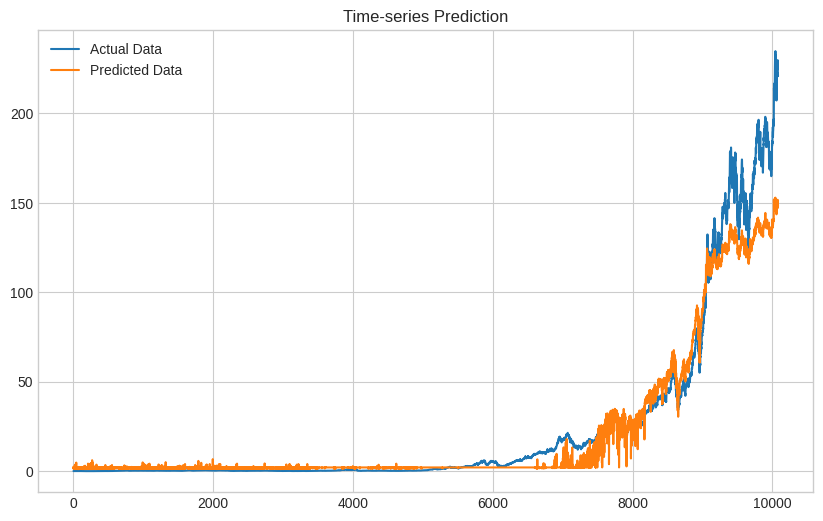

In [111]:
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy()

label_y = df_y_ms.data.numpy()

predicted = ms.inverse_transform(predicted)
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10, 6))
# plt.axvline(x=datetime(2022,5,1), c='r', linestyle='--')

df['pred'] = predicted
plt.plot(df['Close'], label='Actual Data')
plt.plot(df['pred'], label='Predicted Data')

plt.title('Time-series Prediction')
plt.legend()
plt.show()